# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [ ]:
df_pew = pd.read_csv('./data/pew-raw.csv')


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [ ]:
# Display the 'religion' and '<$10k' columns using loc
df_pew.columns = df_pew.columns.str.strip().str.lower()
df_pew.loc[:, ['religion', '<$10k']]

,religion,<$10k
0,Agnostic,27
1,Atheist,12
2,Buddhist,27
3,Catholic,418
4,Dont know/refused,15
5,Evangelical Prot,575
6,Hindu,1
7,Historically Black Prot,228
8,Jehovahs Witness,20
9,Jewish,19


In [ ]:
# Display the first 5 rows of the dataframe
df_pew.head()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [ ]:
# Display the last 5 rows of the dataframe
df_pew.tail()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [ ]:
# Display the first 3 rows using iloc
df_pew.iloc[:3]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58


***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [ ]:
df_pew_melted = pd.melt(df_pew, id_vars=['religion'], var_name='income', value_name='count')
df_pew_melted.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


## Using Replace function

In [ ]:
# Replace the income range values in the 'income' column for better readability
df_pew_melted['income'] = df_pew_melted['income'].replace({
    '<$10k': 'Less than $10k',
    '$10-20k': '$10k-$20k',
    '$20-30k': '$20k-$30k',
    '$30-40k': '$30k-$40k',
    '$40-50k': '$40k-$50k',
    '$50-75k': '$50k-$75k'
})
df_pew_melted.head()

,religion,income,count
0,Agnostic,Less than $10k,27
1,Atheist,Less than $10k,12
2,Buddhist,Less than $10k,27
3,Catholic,Less than $10k,418
4,Dont know/refused,Less than $10k,15


In [ ]:
# Replace '$' and 'k' with blank and 'Less than 10k' with '0-10' in the 'income' column
df_pew_melted['income'] = df_pew_melted['income'].str.replace('$', '', regex=False)
df_pew_melted['income'] = df_pew_melted['income'].str.replace('k', '', regex=False)
df_pew_melted['income'] = df_pew_melted['income'].replace({'Less than 10': '0-10'})
df_pew_melted['income'] = df_pew_melted['income'].str.replace('$', '', regex=False)
df_pew_melted['income'] = df_pew_melted['income'].replace({'Less than 10k': '0-10k'})
df_pew_melted.head()

,religion,income,count
0,Agnostic,0-10,27
1,Atheist,0-10,12
2,Buddhist,0-10,27
3,Catholic,0-10,418
4,Dont know/refused,0-10,15


In [ ]:
# Split the 'income' column into 'income_min' and 'income_max'
df_pew_melted[['income_min', 'income_max']] = df_pew_melted['income'].str.split('-', expand=True)

# Display the updated dataframe
df_pew_melted.head()

,religion,income,count,income_min,income_max
0,Agnostic,0-10,27,0,10
1,Atheist,0-10,12,0,10
2,Buddhist,0-10,27,0,10
3,Catholic,0-10,418,0,10
4,Dont know/refused,0-10,15,0,10


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

2. Observe the first few rows of the dataset.

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

5. Now let's inspect the ***Week*** column in the dataframe.

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

8. How to rename your columns?

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

### Displaying the Entire DataFrame

***The dataset was loaded and displayed with adjusted settings to show all columns and improve readability. This allows a complete view of the data for initial inspection and verification.***

In [ ]:
from io import StringIO
import pandas as pd

# Reading the file from Ddf_cars = pd.read_csv('./CSVs/cars.csv', delimiter=';')
df_cars = pd.read_csv('./data/cars.csv', delimiter=';')

# Optional: Adjust display settings for better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# Display the DataFrame
print(df_cars)


                           Car     MPG Cylinders Displacement Horsepower  Weight Acceleration Model  Origin
0                       STRING  DOUBLE       INT       DOUBLE     DOUBLE  DOUBLE       DOUBLE   INT     CAT
1    Chevrolet Chevelle Malibu     NaN         8        307.0      130.0   3504.         12.0    70      US
2            Buick Skylark 320    15.0         8        350.0        NaN   3693.         11.5    70      US
3           Plymouth Satellite     NaN         8        318.0      150.0   3436.         11.0    70      US
4                AMC Rebel SST    16.0         8          NaN      150.0     NaN         12.0    70      US
..                         ...     ...       ...          ...        ...     ...          ...   ...     ...
402            Ford Mustang GL    27.0         4        140.0      86.00   2790.         15.6    82      US
403          Volkswagen Pickup    44.0         4        97.00      52.00   2130.         24.6    82  Europe
404              Dodge Rampa

First Row seems to be the datatype, we need to remove it

### Removing Non-Data Header Row

***The first row, which contained datatype information rather than actual data, was removed to clean the dataset. The index was reset to maintain proper row numbering.***

In [ ]:
# Remove the first row which contains the datatype information
df_cars = df_cars.iloc[1:].reset_index(drop=True)
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

### Checking for Missing Values

***Counted the number of missing (null) values in each column to identify which features require data cleaning or imputation.***

In [ ]:
df_cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren'at many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

### Calculating Percentage of Missing Values

***Computed the percentage of missing data in each column to better understand the extent of incomplete records and prioritize data cleaning efforts.***

In [ ]:
import numpy as np

# Calculate the percentage of missing values for each column using numpy

missing_percent = df_cars.isnull().sum() / len(df_cars) * 100
print(missing_percent)

Car             0.000000
MPG             0.738916
Cylinders       0.000000
Displacement    0.246305
Horsepower      0.492611
Weight          0.246305
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### Handling Missing Data by Dropping

- Rows containing any missing values were dropped to create a clean dataset without incomplete records.
- Columns with any missing values were also dropped to analyze the impact on the dataset’s structure.
- The number of rows and columns before and after dropping were compared to assess data loss.


In [ ]:
# Drop all rows with any missing values
df_cars_dropped = df_cars.dropna().reset_index(drop=True)
# Drop columns with any missing values
df_cars_col_dropped = df_cars.dropna(axis=1)
print(f"Columns before dropping: {df_cars.shape[1]}")
print(f"Columns after dropping: {df_cars_col_dropped.shape[1]}")
print("Dropped columns:", set(df_cars.columns) - set(df_cars_col_dropped.columns))
df_cars_col_dropped.head()
# Display the shape of the new DataFrame to see how many rows remain
print(f"Rows before dropping: {len(df_cars)}")
print(f"Rows after dropping: {len(df_cars_dropped)}")
df_cars_dropped.head()

Columns before dropping: 9
Columns after dropping: 5
Dropped columns: {'Horsepower', 'MPG', 'Displacement', 'Weight'}
Rows before dropping: 406
Rows after dropping: 401


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
1,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
2,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
3,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US
4,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.,8.5,70,US


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

***This code handles missing values in selected numeric columns of the dataset (`MPG`, `Displacement`, `Horsepower`, `Weight`) by using mean imputation. It first converts these columns to numeric types, then applies `SimpleImputer` from `sklearn` with the strategy set to replace missing values with the mean of each column. Finally, it updates the DataFrame with the imputed values and displays the result.***

In [ ]:
from sklearn.impute import SimpleImputer

# Convert relevant columns to numeric for imputation
cols_to_impute = ['MPG', 'Displacement', 'Horsepower', 'Weight']
df_cars[cols_to_impute] = df_cars[cols_to_impute].apply(pd.to_numeric, errors='coerce')

# Create a SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the columns with missing values
df_cars[cols_to_impute] = imputer.fit_transform(df_cars[cols_to_impute])

# Display the DataFrame after imputation
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

***This code fills the missing values in the 'MPG' column with 0 using pandas' `fillna()` method, and then displays the updated DataFrame.***

In [ ]:
# Fill missing values in the 'MPG' column with 0
df_cars['MPG'] = df_cars['MPG'].fillna(0)
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

***This code creates a simple histogram to show how the 'MPG' (Miles Per Gallon) values are distributed across the dataset. It helps us understand how fuel efficiency varies among the cars by showing how often different MPG values occur.***

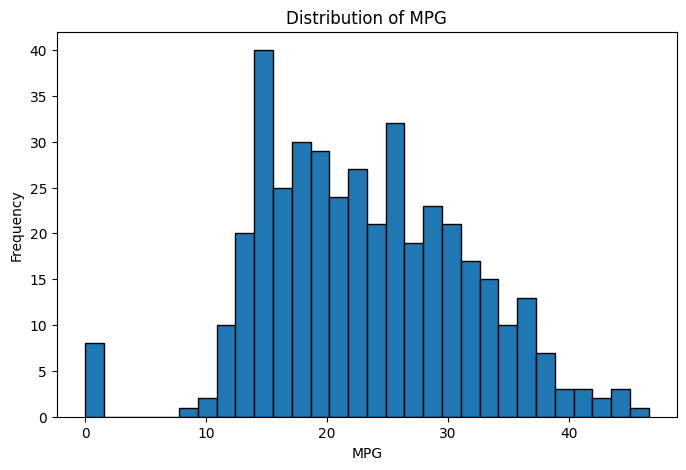

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the MPG column
plt.figure(figsize=(8, 5))
plt.hist(df_cars['MPG'], bins=30, edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

### Missing Value Imputation (MPG Column) 

***Missing values in the 'MPG' (Miles Per Gallon) column were replaced using the column's mean value. This technique ensures no data points are lost and maintains the overall distribution of fuel efficiency in the dataset.***

In [ ]:
# Impute missing values in the 'MPG' column using the mean
mean_mpg = df_cars['MPG'].mean()
df_cars['MPG'] = df_cars['MPG'].fillna(mean_mpg)
print(f"Mean MPG used for imputation: {mean_mpg}")
df_cars.head()

Mean MPG used for imputation: 23.09627791563275


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

### Data Type Conversion for Numerical Analysis

***To prepare the dataset for numerical analysis, columns listed in `cols_to_impute` were converted to numeric types. Any non-numeric values were coerced into `NaN`, allowing for cleaner handling of invalid or inconsistent data entries during the data cleaning process.***


In [ ]:
# Convert columns in cols_to_impute to numeric, coercing errors to NaN
df_cars[cols_to_impute] = df_cars[cols_to_impute].apply(pd.to_numeric, errors='coerce')
df_cars.dtypes

Car              object
MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration     object
Model            object
Origin           object
dtype: object

Now let's see what is the mean of the MPG column

### Calculating the Mean of the 'MPG' Column

***The average (mean) value of the **'MPG' (Miles Per Gallon)** column was calculated to understand the central tendency of fuel efficiency across the dataset. This value can also be used for imputing miss***

In [ ]:
# Calculate and display the mean of the MPG column
mean_mpg = df_cars['MPG'].mean()
print(f"Mean of the MPG column: {mean_mpg}")

Mean of the MPG column: 23.09627791563275


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### Filling Missing 'MPG' Values with the Mean

***After calculating the mean of the **'MPG'** column, all missing values in this column were filled with that mean. This helps maintain data integrity without removing any records, ensuring the dataset remains complete for analysis.***

In [ ]:
# Fill missing values in the 'MPG' column with the computed mean
df_cars['MPG'] = df_cars['MPG'].fillna(mean_mpg)
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

### Missing Value Imputation with SimpleImputer

***Used `SimpleImputer` with the mean strategy to automatically fill missing values in selected numeric columns. This ensures consistent and efficient handling of missing data across multiple columns.***


In [ ]:
from sklearn.impute import SimpleImputer

# Using SimpleImputer to fill missing values in the selected columns with the mean strategy

imputer = SimpleImputer(strategy='mean')
df_cars[cols_to_impute] = imputer.fit_transform(df_cars[cols_to_impute])
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

### Imputation Process Using SimpleImputer

***The imputer first calculated the mean values for the selected columns during the fit step. Then, in the transform step, it replaced all missing values with these computed means, ensuring the dataset has no gaps in those columns.***

In [ ]:
# Step 1: Fit the imputer to compute the statistics (mean in this case)
imputer.fit(df_cars[cols_to_impute])

# Step 2: Transform the data to fill NaN cells with the computed statistics
df_cars[cols_to_impute] = imputer.transform(df_cars[cols_to_impute])

# Display the DataFrame after imputation
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





### Removing Outliers from the 'Horsepower' Column

1. The dataset was loaded from a CSV file using a semicolon (`;`) as the delimiter.
2. The 'Horsepower' column was converted to numeric, with invalid entries replaced by `NaN`.
3. Rows containing `NaN` in 'Horsepower' were dropped to ensure clean data.
4. Outliers in 'Horsepower' were identified and removed using the **Z-score method** with a threshold of 3 standard deviations.
5. The cleaned dataset without outliers was then displayed.

This process helps improve the quality of the data by eliminating extreme values that could skew analysis.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Read CSV with semicolon delimiter
df = pd.read_csv('./Data/cars.csv', delimiter=';')

# Step 2: Convert 'Horsepower' to numeric (non-convertible values become NaN)
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Step 3: Drop rows with NaN in 'Horsepower'
df = df.dropna(subset=['Horsepower'])

# Step 4: Compute Z-score and remove outliers
z = np.abs(stats.zscore(df[['Horsepower']]))
df_no_outliers = df[(z < 3).all(axis=1)]

# Step 5: View result
print(df_no_outliers)


                           Car   MPG Cylinders Displacement  Horsepower Weight Acceleration Model  Origin
1    Chevrolet Chevelle Malibu   NaN         8        307.0       130.0  3504.         12.0    70      US
3           Plymouth Satellite   NaN         8        318.0       150.0  3436.         11.0    70      US
4                AMC Rebel SST  16.0         8          NaN       150.0    NaN         12.0    70      US
5                  Ford Torino  17.0         8        302.0       140.0  3449.         10.5    70      US
7             Chevrolet Impala  14.0         8        454.0       220.0  4354.          9.0    70      US
..                         ...   ...       ...          ...         ...    ...          ...   ...     ...
402            Ford Mustang GL  27.0         4        140.0        86.0  2790.         15.6    82      US
403          Volkswagen Pickup  44.0         4        97.00        52.0  2130.         24.6    82  Europe
404              Dodge Rampage  32.0         4

### Outliers Visualization

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


### Imputing Missing Values Using the Median Strategy

***Instead of the mean, missing values in the selected columns were filled using the **median**. This approach is more robust to outliers, providing a better estimate for skewed data distributions.***


In [ ]:
# SimpleImputer is already imported and used above.
# Here is a quick example of using SimpleImputer with different strategies:

# Fill missing values in df_cars using the median strategy
imputer_median = SimpleImputer(strategy='median')
df_cars[cols_to_impute] = imputer_median.fit_transform(df_cars[cols_to_impute])

# Display the DataFrame after median imputation
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

### Box Plot Visualization

***Box plots were used to visualize the distribution and detect outliers in the selected numeric columns. This helps identify extreme values and understand the spread of the data.***


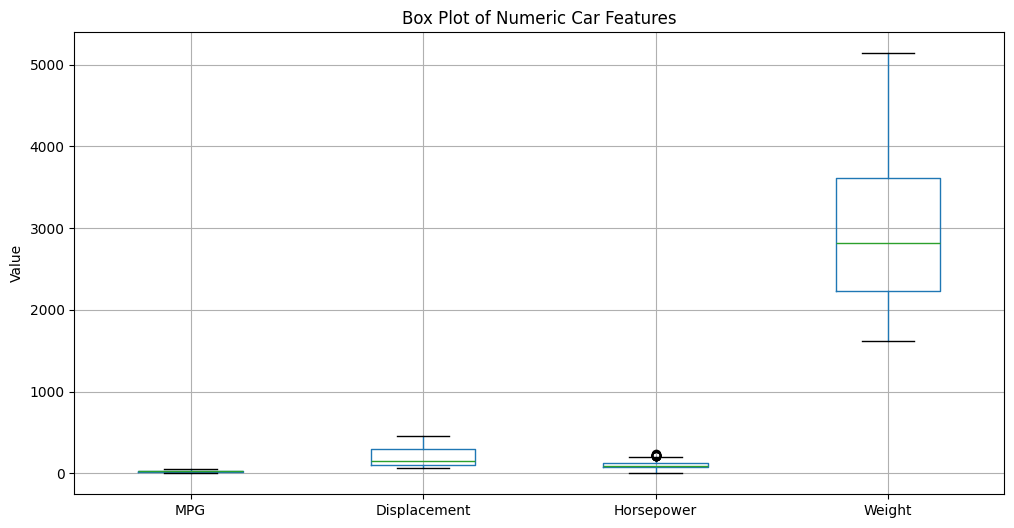

In [ ]:
import matplotlib.pyplot as plt

# Visualize outliers in the selected columns using box plots
plt.figure(figsize=(12, 6))
df_cars[cols_to_impute].boxplot()
plt.title('Box Plot of Numeric Car Features')
plt.ylabel('Value')
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

### Scatter Plot: Horsepower vs. MPG

***A scatter plot was created to visualize the relationship between **Horsepower** and **Miles Per Gallon (MPG)**. This helps to identify trends, correlations, or patterns between engine power and fuel efficiency.***

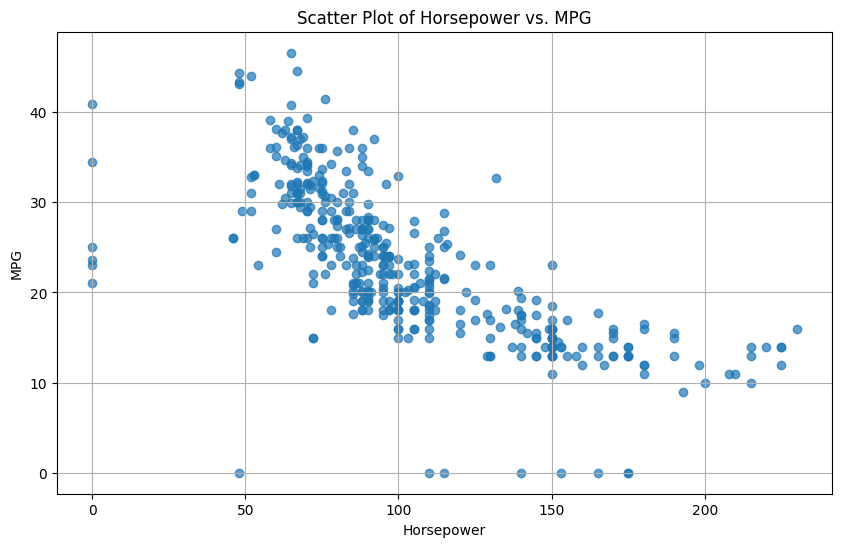

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between 'Horsepower' and 'MPG'
plt.figure(figsize=(10, 6))
plt.scatter(df_cars['Horsepower'], df_cars['MPG'], alpha=0.7)
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



### Summary Statistics and Z-Scores for 'Horsepower'

***Displayed key summary statistics (such as mean, median, and quartiles) for the **'Horsepower'** column to understand its distribution. Additionally, the first 10 Z-scores were shown to help identify how far individual values deviate from the mean.***

In [ ]:
# Display summary statistics for the 'Horsepower' column and its Z-scores
print("Horsepower summary statistics:")
print(df_cars['Horsepower'].describe())
print("\nFirst 10 Z-scores for 'Horsepower':")
z_scores = (df_cars['Horsepower'] - df_cars['Horsepower'].mean()) / df_cars['Horsepower'].std()
print(z_scores[:10])

Horsepower summary statistics:
count    406.000000
mean     103.143564
std       40.129902
min        0.000000
25%       75.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

First 10 Z-scores for 'Horsepower':
[0.67006321 0.         1.16905959 1.16905959 0.9195614  0.
 2.91554693 2.79079784 3.04029603 2.16705236]


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

### Detecting Outliers in 'Horsepower'

***Identified rows where the 'Horsepower' values have a Z-score greater than 2, flagging these as potential outliers. This helps isolate extreme values that may affect data analysis.***

In [ ]:
outliers = df_cars[np.abs(stats.zscore(df_cars['Horsepower'])) > 2]
outliers


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.0,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225.0,4425.0,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.0,8.5,70,US
19,Buick Estate Wagon (sw),14.0,8,455.0,225.0,3086.0,10.0,70,US
31,Ford F250,10.0,8,360.0,215.0,4615.0,14.0,70,US
32,Chevy C20,10.0,8,307.0,200.0,4376.0,15.0,70,US
33,Dodge D200,11.0,8,318.0,210.0,4382.0,13.5,70,US
34,Hi 1200D,9.0,8,304.0,193.0,4732.0,18.5,70,US
38,Ford Pinto,25.0,4,98.0,0.0,2046.0,19.0,71,US


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

### Calculating the Interquartile Range (IQR) for 'Horsepower'

***The 25th percentile (Q1) and 75th percentile (Q3) of the 'Horsepower' column were computed to determine the Interquartile Range (IQR). The IQR measures the middle 50% spread of the data and is useful for identifying outliers.***

In [ ]:
# Calculate IQR for the 'Horsepower' column
Q1 = df_cars['Horsepower'].quantile(0.25)
Q3 = df_cars['Horsepower'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 75.0, Q3: 125.0, IQR: 50.0


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

### Determining Outlier Bounds Using IQR

The upper and lower bounds for detecting outliers were calculated using the IQR method:
- **Upper bound:** Q3 + 1.5 × IQR
- **Lower bound:** Q1 - 1.5 × IQR

Values outside these bounds are considered potential outliers.


In [ ]:
# Define the upper and lower bounds for outlier detection using IQR
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(f"Upper bound: {upper}")
print(f"Lower bound: {lower}")

Upper bound: 200.0
Lower bound: 0.0


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

### Removing Outliers Using the IQR Method

***Rows with 'Horsepower' values outside the calculated IQR bounds were removed to create a cleaner dataset without extreme values. The resulting data is better suited for reliable analysis.***

In [ ]:
# Remove outliers from df_cars based on the IQR method for 'Horsepower'
df_cars_no_outliers = df_cars[(df_cars['Horsepower'] >= lower) & (df_cars['Horsepower'] <= upper)].reset_index(drop=True)
df_cars_no_outliers.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.000000,130.000000,3504.000000,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.000000,103.143564,3693.000000,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.000000,150.000000,3436.000000,11.0,70,US
3,AMC Rebel SST,16.000000,8,194.509877,150.000000,2978.293827,12.0,70,US
4,Ford Torino,17.000000,8,302.000000,140.000000,3449.000000,10.5,70,US


## Creating requirements.txt

In [ ]:
# Create a requirements.txt file with all installed packages and their versions
!pip freeze > requirements.txt